# Task 1

In [11]:
import networkx as nx
import csv
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm

In [12]:
with open('nutrient_data.csv', 'r') as nutrient_data:
    nutrient = csv.reader(nutrient_data)

    G = nx.Graph()
    for row in nutrient:
        source, target = row
        G.add_edge(source, target)

In [13]:
degrees = G.degree()
nodes = G.nodes()


In [ ]:
nx.degree_centrality(G)

In [ ]:
nx.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)

In [16]:

label = nx_comm.modularity(G, nx_comm.label_propagation_communities(G))

In [17]:
louvain = community_louvain.best_partition(G)

In [18]:
n_size = []
for item in degrees:
    number = item[1] * 12
    n_size.append(number)

/var/folders/ws/dtysg26j0ml1937drnq64gfw0000gn/T/ipykernel_56321/2362607315.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(louvain.values()) + 1)


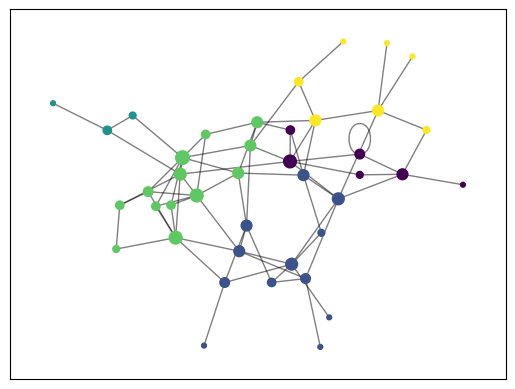

In [19]:
pos1 = nx.spring_layout(G, seed=30)

cmap = cm.get_cmap('viridis', max(louvain.values()) + 1)
nx.draw_networkx_nodes(G, pos1, louvain.keys(), node_size=n_size, cmap=cmap, node_color=list(louvain.values()))
nx.draw_networkx_edges(G, pos1, alpha=0.5)
plt.show()

# Task 2

### Nr1. Find all American Politicians whose fathers were also politician. 
```sql
SELECT ?person ?personLabel ?father ?fatherLabel
WHERE {
  ?person wdt:P31 wd:Q5.
  ?person wdt:P27 wd:Q30.
  ?person wdt:P106 wd:Q82955.
  ?person wdt:P22 ?father.
  ?father wdt:P106 wd:Q82955.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

### Nr2. Find all Norwegian Poets whose date of birth is after 1950.
```sql
SELECT ?person ?personLabel 
WHERE {
  ?person wdt:P31 wd:Q5. # Is a Human
  ?person wdt:P27 wd:Q20. # Lives in Norway
  ?person wdt:P106 wd:Q49757. # Is a Poet
  ?person wdt:P569 ?dateOfBirth # Date of Birth
  FILTER(YEAR(?dateOfBirth) > 1950) # Filter for date of birth after 1950
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

### Nr3. Count number of universities in wikidata.
```sql
SELECT (COUNT(*) AS ?count)
WHERE {
   ?item wdt:P31 wd:Q3918 # Is a University
}

### Nr4. Find all Norwegian Poets who are also politicians. Show their birthplace in a map.
```sql
SELECT *
WHERE {
  ?person wdt:P31 wd:Q5. # Is a human
  ?person wdt:P27 wd:Q20. # Lives in Norway
  ?person wdt:P106 wd:Q49757. # Is a poet
  ?person wdt:P106 wd:Q82955. # Is a politician
  ?person wdt:P19 ?birthplace. # Place of birth
  ?birthplace wdt:P625 ?geo # Coordiante location
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

### Nr5. Show the birthplace of all people in a map who received Nobel prizes.
```sql
SELECT DISTINCT ?person ?personLabel ?nobelPrizeLabel ?birthplace ?geo
WHERE {
  ?person wdt:P31 wd:Q5. # Is human
  ?person wdt:P166 ?nobelPrize. # Is award
  ?person wdt:P19 ?birthplace. # Place of birth
  ?birthplace wdt:P625 ?geo. # Place of birth coordinate
  ?nobelPrize wdt:P279 wd:Q7191. # Is Nobel price          
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}